<img src="currywurst.jpg">,

<h1 align=center><font size = 5>Food trends for Munich from Berlin</font></h1>

In [1]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

print('Libraries imported.')



Solving environment: done

# All requested packages already installed.

Solving environment: done

# All requested packages already installed.

Libraries imported.


To avoid executing redundant api calls we saved the geo data in a csv 

In [2]:
m_district = pd.read_csv('munich_districts_geo.csv')
b_district = pd.read_csv('berlin_districts_geo.csv')

## Scrape the districts of Munich from Wikipedia

In [2]:
from bs4 import BeautifulSoup
import requests

r  = requests.get("https://de.wikipedia.org/wiki/Liste_der_Stadtteile_M%C3%BCnchens")
m_wiki_html = r.text

m_soup = BeautifulSoup(m_wiki_html)
# print(m_soup.prettify())

In [ ]:
table = m_soup.find('table', attrs={'class':'wikitable sortable zebra'})
table_rows = table.find_all('tr')
l = []
for tr in table_rows:
    td = tr.find_all('td')
    row = [tr.text for tr in td]
    l.append(row)
m_df  = pd.DataFrame(l, columns=["District", "Borough", "Borough-nr", "Neighborhood"])

m_df = m_df.astype(str)
m_df = m_df[ (m_df.District != 'None')  ]

m_district = pd.DataFrame({ 'District': m_df.District.unique(), 'lat': np.nan , 'long': np.nan } ) 
m_district['District'] = m_df['District'].str.replace("teil", "")
m_district['District'] = m_df['District'].str.replace("Unter- und", "")
m_district.head()

## Scrape the districts of Berlin from Wikipedia

In [40]:
rb  = requests.get("https://de.wikipedia.org/wiki/Verwaltungsgliederung_Berlins")
b_wiki_html = rb.text

b_soup = BeautifulSoup(b_wiki_html)

In [57]:
table = b_soup.find('table', attrs={'class':'wikitable sortable zebra'})
table_rows = table.find_all('tr')
l = []
for tr in table_rows:
    td = tr.find_all('td')
    row = [tr.text for tr in td]
    l.append(row)


In [100]:
b_df  = pd.DataFrame(l, columns=["Nr","Borough", "District", "c4", "c5", "c6","c7", "c8"])
b_df.District = b_df.District.str.replace('\d+', ',')
b_df.District = b_df.District.str.replace('\n', '')
b_df = b_df[['District']]
b_df.District = b_df.District.str.split(",")
b_df = b_df.explode('District')
b_df = b_df.dropna()
b_df = b_df[b_df.District != '']
b_district = pd.DataFrame({ 'District': b_df.District.unique(), 'lat': np.nan , 'long': np.nan } ) 
b_district

,District,lat,long
0,Mitte,NaN,NaN
1,Moabit,NaN,NaN
2,Hansaviertel,NaN,NaN
3,Tiergarten,NaN,NaN
4,Wedding,NaN,NaN
5,Gesundbrunnen,NaN,NaN
6,Friedrichshain,NaN,NaN
7,Kreuzberg,NaN,NaN
8,Prenzlauer Berg,NaN,NaN
9,Weißensee,NaN,NaN


### Get the geo data for Munich and Berlin districts from geopy

In [4]:
m_address_postfix = 'Munich {} Germany'
b_address_postfix = 'Berlin {} Germany'
geolocator = Nominatim(user_agent="t_explorer")

m_location = geolocator.geocode(m_address_postfix)
m_lat = m_location.latitude
m_long =  m_location.longitude

b_location = geolocator.geocode(b_address_postfix)
b_lat = b_location.latitude
b_long =  b_location.longitude


In [102]:
def get_lat_long(dist, address_postfix):
    for i,row in dist.iterrows() :
        try:
            if np.isnan(row['lat']):
                print(address_postfix.format(row['District']))
                location = geolocator.geocode( address_postfix.format(row['District']))
                dist.at[i,'lat'] = location.latitude
                dist.at[i, 'long'] = location.longitude    
        except Exception as e:
            print(row)
            print(e)              

### Loop to get geodata as the service is instable

In [103]:
for i in range(0,4):
    get_lat_long(m_district, m_address_postfix)
    get_lat_long(b_district, b_address_postfix)
    
m_district.dropna(inplace=True)
b_district.dropna(inplace=True)

Berlin  Mitte Germany
Berlin  Moabit Germany
Berlin  Hansaviertel Germany
Berlin  Tiergarten Germany
Berlin  Wedding Germany
Berlin  Gesundbrunnen Germany
Berlin  Friedrichshain Germany
Berlin  Kreuzberg Germany
Berlin  Prenzlauer Berg Germany
Berlin  Weißensee Germany
Berlin  Blankenburg Germany
Berlin  Heinersdorf Germany
Berlin  Karow Germany
Berlin  Stadtrandsiedlung Malchow Germany
Berlin  Pankow Germany
Berlin  Blankenfelde Germany
Berlin  Buch Germany
Berlin  Französisch Buchholz Germany
Berlin  Niederschönhausen Germany
Berlin  Rosenthal Germany
Berlin  Wilhelmsruh Germany
Berlin  Charlottenburg Germany
Berlin  Wilmersdorf Germany
Berlin  Schmargendorf Germany
District     Schmargendorf
lat                    NaN
long                   NaN
Name: 23, dtype: object
Service timed out
Berlin  Grunewald Germany
Berlin  Westend Germany
Berlin  Charlottenburg-Nord Germany
Berlin  Halensee Germany
Berlin  Spandau Germany
Berlin  Haselhorst Germany
Berlin  Siemensstadt Germany
Berlin  S

In [104]:
b_district

,District,lat,long
0,Mitte,52.533216,13.359796
1,Moabit,52.534679,13.334478
2,Hansaviertel,52.519985,13.348070
3,Tiergarten,52.514375,13.336450
4,Wedding,52.542787,13.367000
5,Gesundbrunnen,52.548645,13.390217
6,Friedrichshain,52.510745,13.435171
7,Kreuzberg,52.502247,13.395149
8,Prenzlauer Berg,52.549243,13.415596
9,Weißensee,52.558329,13.439551


In [81]:
m_district

,District,lat,long
0,Allach,48.137828,11.574582
1,Altstadt,48.195925,11.571815
2,Am Hart,48.133867,11.666309
3,Am Moosfeld,48.182373,11.558598
4,Am Riesenfeld,48.128753,11.586119
5,Au,48.158437,11.414066
6,Aubing,48.123483,11.633451
7,Berg am Laim,48.154782,11.633484
8,Bogenhausen,48.149637,11.649305
9,Daglfing,48.150402,11.641643


In [21]:
m_district.to_csv('munich_districts_geo.csv', index=False)   

In [105]:
b_district.to_csv('berlin_districts_geo.csv', index=False)   

### Show Munich districts

In [5]:
# create map of Munich using latitude and longitude values
map_m= folium.Map(location=[m_lat, m_long], zoom_start=12)

# add markers to map
for lat, lng, district in zip(m_district['lat'], m_district['long'], m_district['District']):
    label = folium.Popup(district, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_m)  
    
map_m

### Show Berlin districts

In [6]:
# create map of Berlin using latitude and longitude values
map_b= folium.Map(location=[b_lat, b_long], zoom_start=12)

# add markers to map
for lat, lng, district in zip(b_district['lat'], b_district['long'], b_district['District']):
    label = folium.Popup(district, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_b)  
    
map_b

#### Define Foursquare Credentials and Version

In [39]:
CLIENT_ID = '51XNWNFOL3X4JNRAZ4WN5QGZTUZOTGLFSVNAUHCX4AA0IFCJ' # your Foursquare ID
CLIENT_SECRET = 'XQ51E3SQSXNQHNBHEFVJFC0EKGX4Z2MENHPCPUVIVATKYANU' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: 51XNWNFOL3X4JNRAZ4WN5QGZTUZOTGLFSVNAUHCX4AA0IFCJ
CLIENT_SECRET:XQ51E3SQSXNQHNBHEFVJFC0EKGX4Z2MENHPCPUVIVATKYANU


### Aggregate the most popular food venues by district

In [37]:
def getNearbyVenues(names, latitudes, longitudes, radius=1000, categoryId='4d4b7105d754a06374d81259'):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&categoryId={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            categoryId,
            150)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [111]:

munich_food_venues = getNearbyVenues(names=m_district['District'],
                                   latitudes=m_district['lat'],
                                   longitudes=m_district['long']
                                  )



In [116]:
berlin_food_venues = getNearbyVenues(names=b_district['District'],
                                   latitudes=b_district['lat'],
                                   longitudes=b_district['long']
                                  )

In [113]:
print(munich_food_venues.shape)
munich_food_venues.drop_duplicates(subset =["Venue", "Venue Longitude","Venue Latitude"], keep = 'first', inplace = True) 
print(munich_food_venues.shape)

In [117]:
munich_food_venues.to_csv('munich_food_venues.csv', index=False)   
munich_food_venues


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Allach,48.137828,11.574582,Augustiner Klosterwirt,48.138649,11.572527,German Restaurant
1,Allach,48.137828,11.574582,Kilians,48.138720,11.574556,Irish Pub
2,Allach,48.137828,11.574582,Andechser am Dom,48.138302,11.573778,Bavarian Restaurant
3,Allach,48.137828,11.574582,Chocolaterie Beluga,48.135750,11.575776,Café
4,Allach,48.137828,11.574582,Bite Delite,48.139996,11.575072,Café
5,Allach,48.137828,11.574582,Leger am Dom,48.138262,11.572932,Restaurant
6,Allach,48.137828,11.574582,Ratskeller,48.137583,11.576337,Bavarian Restaurant
7,Allach,48.137828,11.574582,La Burrita,48.136143,11.574489,Burrito Place
8,Allach,48.137828,11.574582,ARAN Fünf Höfe,48.140715,11.576499,Café
9,Allach,48.137828,11.574582,Restaurant Dallmayr,48.138489,11.576791,German Restaurant


In [118]:
print(berlin_food_venues.shape)
berlin_food_venues.drop_duplicates(subset =["Venue", "Venue Longitude", "Venue Latitude"], keep = 'first', inplace = True) 
print(berlin_food_venues.shape)

(1788, 7)
(1635, 7)


In [119]:
berlin_food_venues.to_csv('berlin_food_venues.csv', index=False)   
print(berlin_food_venues.shape)
berlin_food_venues


(1635, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Mitte,52.533216,13.359796,Güllü Lahmacun,52.532217,13.350061,Turkish Restaurant
1,Mitte,52.533216,13.359796,Sapori Di Casa,52.527425,13.351519,Italian Restaurant
2,Mitte,52.533216,13.359796,Göttlich Essen & Trinken,52.541904,13.357131,Café
3,Mitte,52.533216,13.359796,Esszimmer,52.533580,13.371192,Restaurant
4,Mitte,52.533216,13.359796,Thea & coffee,52.531051,13.346191,Café
5,Mitte,52.533216,13.359796,Valladares,52.533606,13.347147,Vegetarian / Vegan Restaurant
6,Mitte,52.533216,13.359796,Osmanya,52.530963,13.346836,Turkish Restaurant
7,Mitte,52.533216,13.359796,Deichgraf,52.539787,13.352246,German Restaurant
8,Mitte,52.533216,13.359796,Naveena Path,52.541741,13.357281,Indian Restaurant
9,Mitte,52.533216,13.359796,Ressort Berlin,52.531187,13.370331,Restaurant


In [4]:
berlin_food_venues = pd.read_csv('berlin_food_venues.csv')
munich_food_venues = pd.read_csv('munich_food_venues.csv')

In [5]:

m_venue_counts = munich_food_venues.groupby(['Venue Category'])['Venue Category'] \
                             .count() \
                             .reset_index(name='m_count') \
                             .sort_values(['m_count'], ascending=False) 


In [6]:
b_venue_counts = berlin_food_venues.groupby(['Venue Category'])['Venue Category'] \
                             .count() \
                             .reset_index(name='b_count') \
                             .sort_values(['b_count'], ascending=False) 


### Look at the most popular food venues types of Berlin

In [29]:
top = pd.merge(left=m_venue_counts,right=b_venue_counts, left_on='Venue Category', right_on='Venue Category')
top = top.loc[ (top.b_count > 30)  ]

top

,Venue Category,m_count,b_count
0,Bakery,153,201
1,Italian Restaurant,144,159
2,Café,133,188
3,German Restaurant,111,87
4,Restaurant,48,62
5,Asian Restaurant,47,55
7,Pizza Place,43,42
8,Indian Restaurant,38,35
10,Burger Joint,26,32
11,Vietnamese Restaurant,26,57


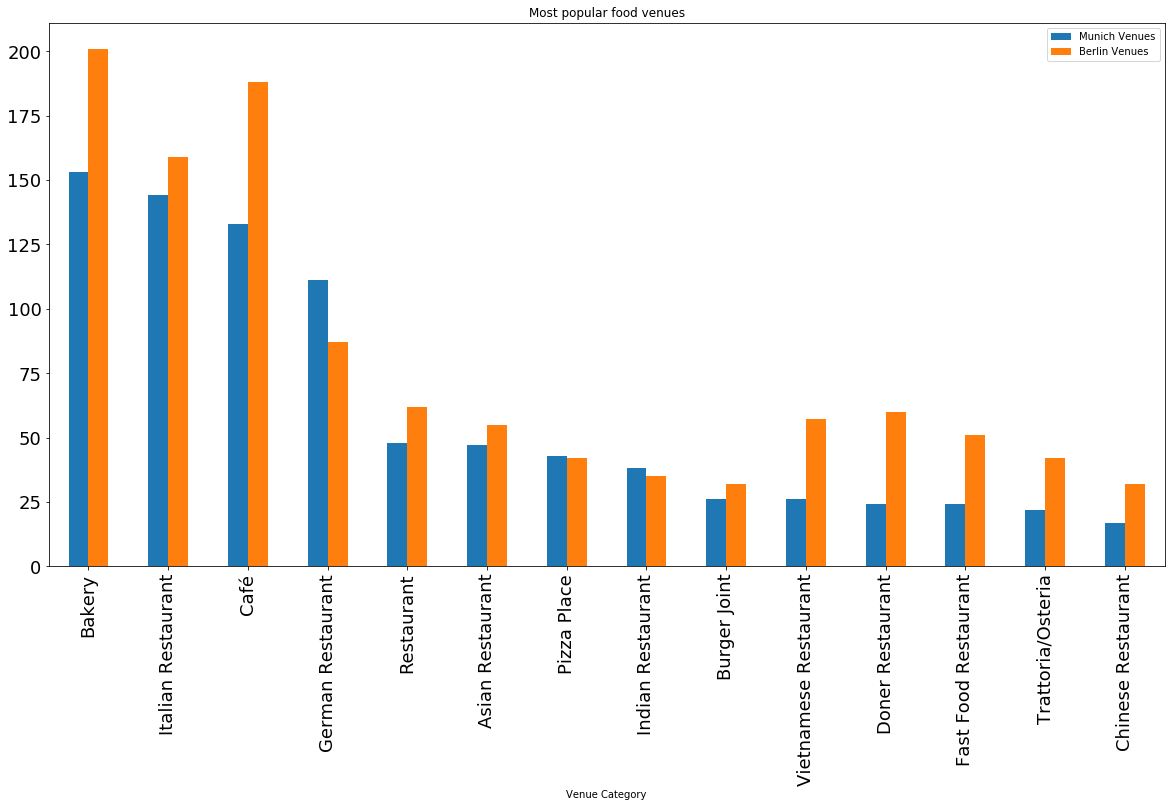

In [31]:
top = top.rename(columns={"m_count": "Munich Venues", "b_count": "Berlin Venues"})
top.plot.bar(x='Venue Category', figsize=(20,10), fontsize = 18, title='Most popular food venues')

### Look at rare food types in Munich and compare them with Berlin

In [17]:
t = pd.merge(left=m_venue_counts,right=b_venue_counts, how='right', left_on='Venue Category', right_on='Venue Category')

t['m_count'] = t['m_count'].apply(lambda x: 0 if np.isnan(x) else x )
t['b_count'] = t['b_count'].apply(lambda x: 0 if np.isnan(x) else x )

t = t.loc[ (abs(t.m_count - t.b_count) > 3) & (((t.m_count < 3) & (t.b_count > 1)) | ((t.b_count < 3) & (t.m_count > 5))) ]

t = t.sort_values(['b_count'])
t

,Venue Category,m_count,b_count
9,Bavarian Restaurant,30.0,1
33,Afghan Restaurant,7.0,1
41,Irish Pub,6.0,2
69,Argentinian Restaurant,1.0,9
73,Currywurst Joint,1.0,12
61,Korean Restaurant,2.0,14


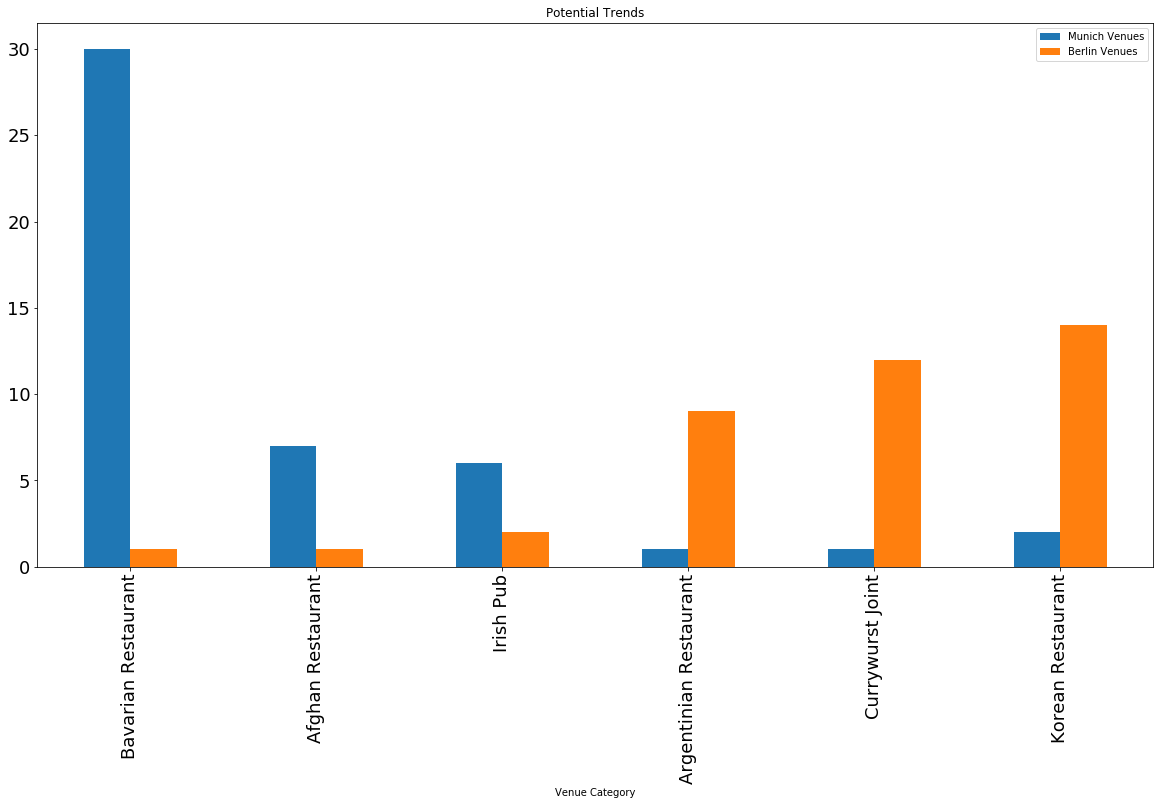

In [32]:

t = t.rename(columns={"m_count": "Munich Venues", "b_count": "Berlin Venues"})
t.plot.bar(x='Venue Category', figsize=(20,10), fontsize = 18, title='Potential Trends')

### Load more precise Foursquare venue counts for the most promosing food types

In [35]:
korean = '4bf58dd8d48988d113941735'
currywurst = '56aa371ce4b08b9a8d57358b'
argentinian = '4bf58dd8d48988d107941735'
afgan = '503288ae91d4c4b30a586d67'
irish = '52e81612bcbc57f1066b7a06'
bavarian = '56aa371ce4b08b9a8d573572'
styles = [korean, currywurst, argentinian, afgan, irish, bavarian]


In [43]:
vs = pd.DataFrame()

for style in styles:
     vs = vs.append(getNearbyVenues(names=['Munich'],
                                   latitudes=[m_lat],
                                   longitudes=[m_long],
                                   radius=10000,
                                   categoryId = style
                                  ))

vs.shape

(145, 7)

In [44]:
for style in styles:
     vs = vs.append(getNearbyVenues(names=['Berlin'],
                                   latitudes=[b_lat],
                                   longitudes=[b_long],
                                   radius=10000,
                                   categoryId = style
                                  ))

vs.shape

(358, 7)

In [49]:
vs.to_csv('final_venues.csv', index=False)   
vs

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Munich,48.137108,11.575382,Arisu,48.140065,11.588438,Korean Restaurant
1,Munich,48.137108,11.575382,Zum Koreaner,48.149223,11.577772,Korean Restaurant
2,Munich,48.137108,11.575382,Kims Restaurant,48.151563,11.562754,Korean Restaurant
3,Munich,48.137108,11.575382,Seoul,48.166657,11.586624,Korean Restaurant
4,Munich,48.137108,11.575382,Yuyumi,48.130521,11.572626,Korean Restaurant
5,Munich,48.137108,11.575382,The Drunken Dragon Bar,48.132017,11.567410,Asian Restaurant
6,Munich,48.137108,11.575382,Asia Lebensmittel - Imbiss,48.129942,11.557416,Grocery Store
7,Munich,48.137108,11.575382,Hey Luigi!,48.128838,11.568269,Italian Restaurant
0,Munich,48.137108,11.575382,Gute Nacht Wurst,48.130958,11.574861,Currywurst Joint
1,Munich,48.137108,11.575382,Curry-Banditen,48.125223,11.549295,Currywurst Joint


In [57]:
vs_counts = vs.groupby(['Venue Category', 'Neighborhood'])['Venue Category'] \
                             .count() \
                             .reset_index(name = 'counts') \
                             .sort_values(['Venue Category'], ascending=False) 


In [60]:
vs_counts = vs_counts[ vs_counts['Venue Category'].isin( 
                           ['Korean Restaurant', 'Irish Pub', 'Currywurst Joint', 'Bavarian Restaurant', 'Argentinian Restaurant', 'Afghan Restaurant'])]

In [61]:
vs_counts  

,Venue Category,Neighborhood,counts
38,Korean Restaurant,Munich,5
37,Korean Restaurant,Berlin,70
35,Irish Pub,Munich,7
34,Irish Pub,Berlin,10
24,Currywurst Joint,Munich,5
23,Currywurst Joint,Berlin,47
10,Bavarian Restaurant,Munich,45
9,Bavarian Restaurant,Berlin,7
2,Argentinian Restaurant,Berlin,18
3,Argentinian Restaurant,Munich,3


In [71]:
piv = vs_counts.pivot_table(index=['Venue Category'], columns='Neighborhood', values= 'counts')
piv.reset_index(level=0, inplace=True)

Neighborhood,Berlin,Munich
Venue Category,,
Afghan Restaurant,9,14
Argentinian Restaurant,18,3
Bavarian Restaurant,7,45
Currywurst Joint,47,5
Irish Pub,10,7
Korean Restaurant,70,5


In [91]:
piv = piv.drop(columns=['level_0', 'index'])

Index(['Venue Category', 'Berlin', 'Munich'], dtype='object', name='Neighborhood')

In [101]:
idx = pd.Index(piv)
idx = idx.rename('City')
piv.columns

Index(['Venue Category', 'Berlin', 'Munich'], dtype='object', name='Neighborhood')

In [105]:
piv = piv[ piv['Venue Category'].isin( 
                           ['Korean Restaurant',  'Currywurst Joint', 'Bavarian Restaurant', 'Argentinian Restaurant' ])]

In [110]:
piv = piv.sort_values(by=['Munich'])

In [112]:
piv.to_csv('piv.csv', index=False) 

### The most promising food types 

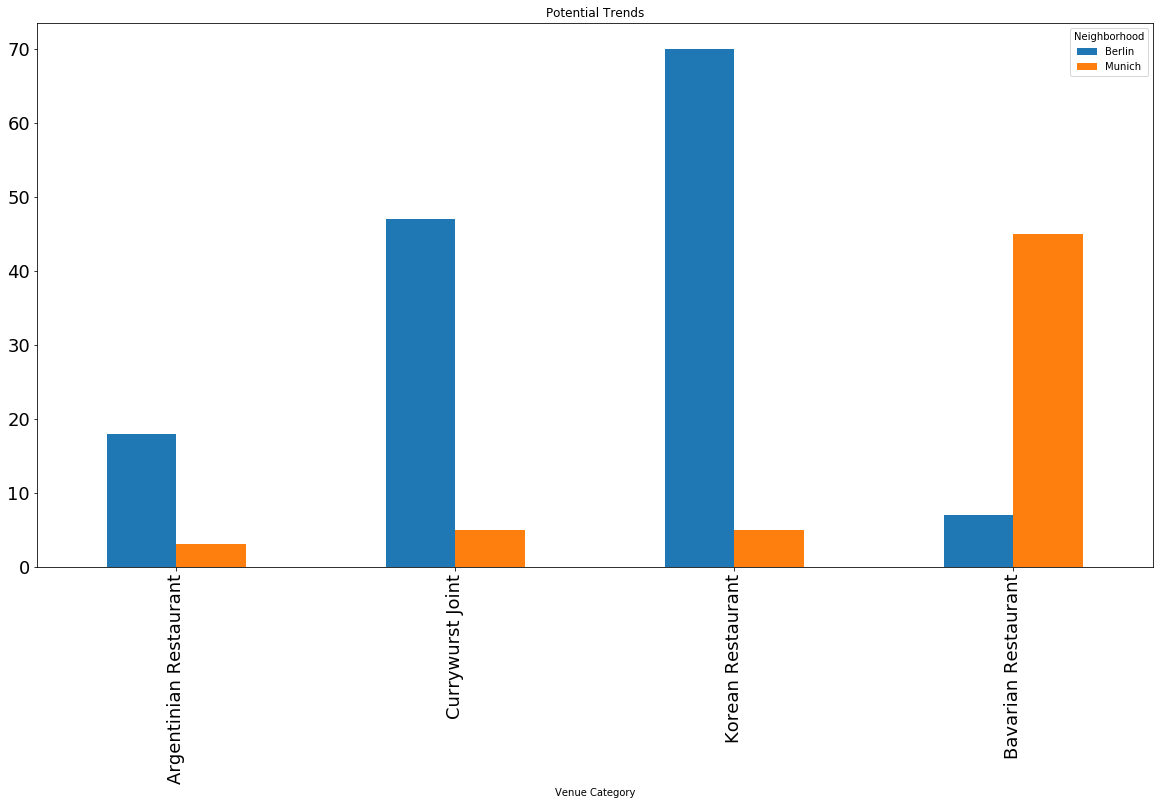

In [111]:

piv.plot.bar(x='Venue Category', figsize=(20,10), fontsize = 18, title='Potential Trends')
